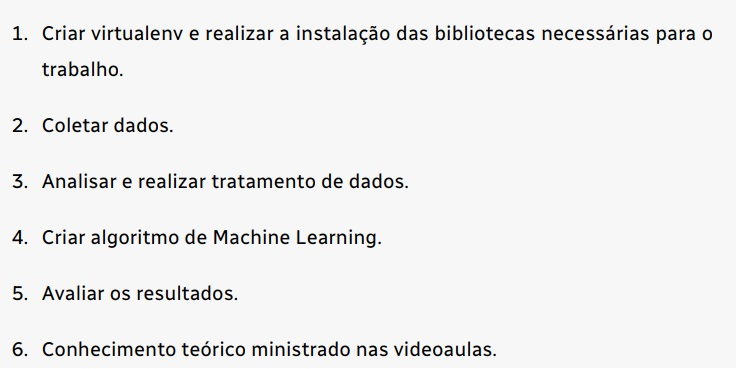

In [76]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [77]:
!pip install seaborn

In [78]:
# collect data
heart_data = pd.read_csv('heart.csv', sep = ',')


In [79]:
# data analysing
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       342 non-null    int64  
 1   sex       342 non-null    int64  
 2   cp        342 non-null    int64  
 3   trtbps    342 non-null    int64  
 4   chol      342 non-null    int64  
 5   fbs       342 non-null    int64  
 6   restecg   342 non-null    int64  
 7   thalachh  342 non-null    int64  
 8   exng      342 non-null    int64  
 9   oldpeak   342 non-null    float64
 10  slp       342 non-null    int64  
 11  caa       342 non-null    int64  
 12  thall     342 non-null    int64  
 13  output    342 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 37.5 KB


In [80]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
heart_data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
337,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
338,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
339,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
340,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
341,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0


In [82]:
heart_data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [83]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [84]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,54.380117,0.695906,0.926901,132.157895,245.880117,0.154971,0.532164,148.643275,0.350877,1.059649,1.383041,0.730994,2.347953,0.500000
std,9.094258,0.460696,1.031999,17.758520,51.725706,0.362407,0.528224,23.059561,0.477944,1.155712,0.614635,1.017806,0.625915,0.500733
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,209.250000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.500000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,164.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [86]:
# counting output (heart attack chance -> 0 = less chance / 1 = More Chance)
heart_data.groupby(['output'])['output'].count()

output
0    171
1    171
Name: output, dtype: int64

# data mapping
age - years old

sex - 0 female / 1 male

cp - chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
    
trtbps - Resting Blood Pressure - mmHg

chol - cholesterol - mg/dL

fbs - Fasting Blood Sugar - over 120 mg/dL = 1 yes / less than 120 mg/dL = 0 no

restecg - Resting Electrocardiographic Results
    Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    Value 1: normal
    Value 2: having ST-T wave abnormality (T wave inversions and/or ST)
    
thalach - Maximum Heart Rate Achieved

exng - Exercise Induced Angina - 1 = yes / 0 = no

oldpeak - ST Depression Induced by Exercise Relative to Rest

slp - Slope of the Peak Exercise ST Segment

caa - Number of Major Vessels (0-3) Colored by Fluoroscopy

thall - Thalassemia
    0: NULL (dropped from the dataset previously)
    Value 1: fixed defect (no blood flow in some part of the heart)
    Value 2: normal blood flow
    Value 3: reversible defect (a blood flow is observed but it is not normal)

output - chance de ter um ataque cardíaco.
    0= less chance of heart attack
    1= more chance of heart attack

In [87]:
# finding duplicate values
heart_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
337     True
338     True
339     True
340     True
341     True
Length: 342, dtype: bool

In [88]:
heart_data.duplicated().sum()

40

In [89]:
heart_data_unique = heart_data.drop_duplicates()

In [90]:
heart_data_unique.groupby(['output'])['output'].count()

output
0    138
1    164
Name: output, dtype: int64

In [91]:
# calcular desvio padrao de idade
heart_data_unique.age.std()

9.047969746247457

In [92]:
heart_data_unique.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 302, dtype: bool

In [93]:
heart_data_unique.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [94]:
heart_data_unique['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [95]:
heart_data_unique.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

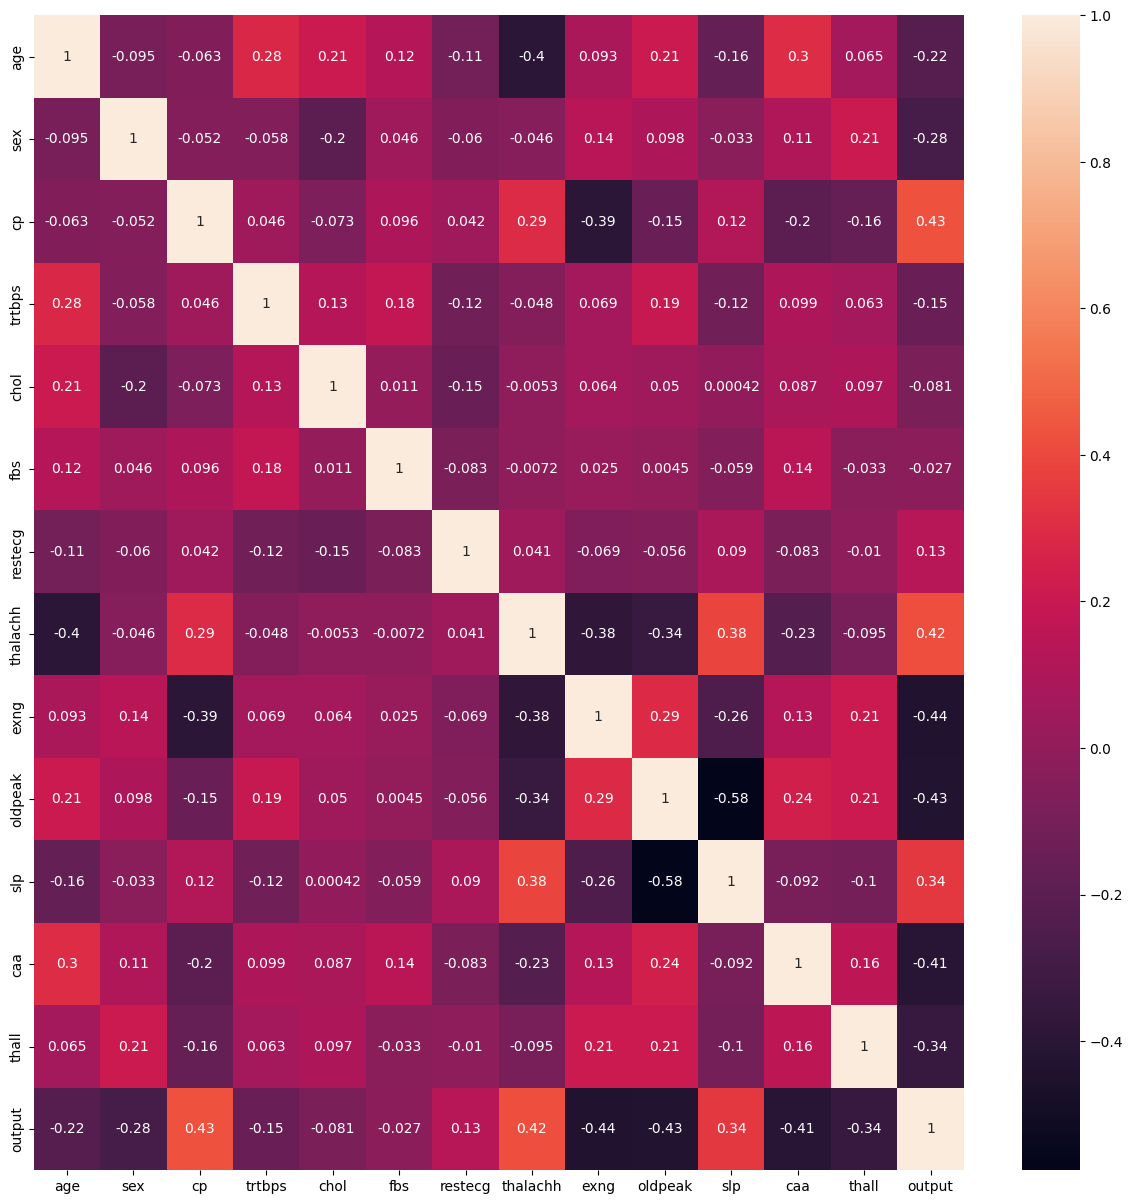

In [96]:
plt.figure(figsize=(15,15))
sns.heatmap(
        data=heart_data_unique.corr(),
        annot=True,
)

In [97]:
heart_data_features = heart_data_unique.drop('output', axis=1)
heart_data_features

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [98]:
def split_train_test(X_dados, y_dados):
    X_train, X_test, y_train, y_test = train_test_split(X_dados, y_dados, random_state=42, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [99]:
X_data = heart_data_unique.drop('output', axis=1).values
y_data = heart_data_unique['output'].values

In [100]:
y_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [101]:
X_data

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [102]:
X_train, X_test, y_train, y_test = split_train_test(X_dados, y_dados)

In [103]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

241 61 241 61


In [104]:
#tree decision

classifier = tree.DecisionTreeClassifier(random_state=42)
model_ = classifier.fit(X_train, y_train)
y_pred = model_.predict(X_test)


In [105]:
print(model_.feature_importances_)

[0.1136764  0.0450807  0.05281757 0.06608638 0.09834371 0.01842508
 0.         0.05391041 0.         0.12415529 0.06185665 0.12005322
 0.24559459]


In [106]:
heart_data_unique.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [107]:
# most important feature
def generate_features_importants(model_):
    return heart_data_unique.DataFrame(model_.feature_importances_, columns=['importance'],
                        index=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']).sort_values('importance', ascending=False)

In [108]:
# data balancing - encapsulate the balacing task
def data_balance(X_data, y_data):
    undersample = RandomUnderSampler(random_state=42) # RandomUnderSampler object
    X_under, y_under = undersample.fit_resample(X_data, y_data) # data undersampling among feature and target data and saving in 2 variables
    tl = TomekLinks(sampling_strategy='all') # sampled data cleaning
    X_under, y_under = tl.fit_resample(X_under, y_under)
    return X_under, y_under

In [109]:
# using data balance function - apply it on treated dataset
X_balanced_data, y_balanced_data = data_balance(X_data, y_data)

In [110]:
# data_balancing verification - balancing process success verification
print(len(X_balanced_data), len(y_balanced_data))

220 220


In [111]:
# Verifying target classes quatity - balancing process success verification
import collections
print(collections.Counter(y_balanced_data))

Counter({0: 110, 1: 110})


In [112]:
# Presenting the features ndArray shape - shape comprehension (lines and columns) from matrix features
X_balanced_data.shape

(220, 13)

## ML Algotithm - Random Forest

In [113]:
# Separating the train and test the bases - test the Random Forest prediction capacity 

# Creating a function for dataset separation, with 20% of the data for test base
def separar_treino_teste(X_dados_balanceados, y_dados_balanceados):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced_data,
                                                        y_balanced_data,
                                                        random_state=42,
                                                        test_size=0.2)
    return X_train, X_test, y_train, y_test

# Storing the train and test features and target in variables
X_train, X_test, y_train, y_test = separar_treino_teste(X_balanced_data, y_balanced_data)

In [116]:
#verifying the train and test registers quantity
print(f'X_train: {len(X_train)}')
print(f'y_train: {len(y_train)}')
print(f'X_test: {len(y_test)}')
print(f'y_test: {len(y_test)}')

X_train: 176
y_train: 176
X_test: 44
y_test: 44


In [117]:
# random forest classifier
classifier = RandomForestClassifier(random_state=42)

#classification model
model = classifier.fit(X_train, y_train)

# do the predictions
y_pred = model.predict(X_test)

In [118]:
# creating a dataframe with the model importants values - analyse the MOST IMPORTANT FEATURES

pd.DataFrame(model.feature_importances_, columns=['Importancia'], 
            index=heart_data_features.columns).sort_values('Importancia', ascending=False)

,Importancia
thalachh,0.126951
cp,0.125280
caa,0.120775
thall,0.117353
oldpeak,0.109878
age,0.079217
chol,0.079063
trtbps,0.072934
exng,0.056606
slp,0.056349


In [119]:
# model accuracy calculation - analyze the model prediction accuracy

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8409090909090909


In [121]:
#confusion matrix calculation
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17  5]
 [ 2 20]]


<function matplotlib.pyplot.show(close=None, block=None)>

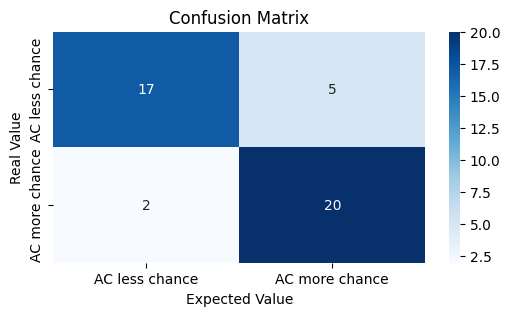

In [122]:
# confusion matrix visualization
# Visualizando a matriz de confusão
labels=['AC less chance', 'AC more chance']
plt.figure(figsize=(6,3))
sns.heatmap(data=cm,
            annot=True,
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels
            )
plt.xlabel('Expected Value')
plt.ylabel('Real Value')
plt.title('Confusion Matrix')
plt.show

In [123]:
# generating classification report 
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.80      0.91      0.85        22

    accuracy                           0.84        44
   macro avg       0.85      0.84      0.84        44
weighted avg       0.85      0.84      0.84        44



In [127]:
# predictions
y_pred = model.predict([[33,1,3,50,2,1,0,150,0,4,0,27,1]])
y_pred

array([0], dtype=int64)

<Axes: title={'center': 'Values Correlation "output" and "cp"'}>

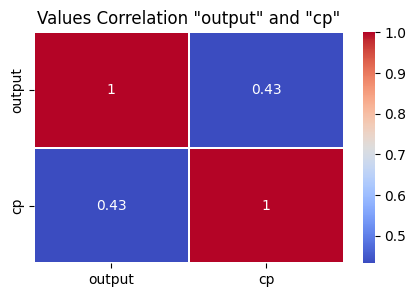

In [129]:
plt.figure(figsize=(5,3))
plt.title('Values Correlation "output" and "cp"')
corr_output_cp = heart_data_unique[['output','cp']]
sns.heatmap(corr_output_cp.corr(), cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)